<a href="https://colab.research.google.com/github/Linkabli/dap-2024/blob/main/lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №8. Кластеризация

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в ваш репозиторий github в директорию ./les08
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Ирисы Фишера — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном.

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.12.2 (main, Mar 12 2024, 08:01:18) [GCC 12.2.0]
Numpy version: 2.1.0
Pandas version: 2.2.2
Matplotlib version: 3.9.2


1. Импортируйте модель данных "Ирисы Фишера".

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


2. Выполните нормализацию данных

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, :-1])

3. Постройте модель кластеризации используя алгоритм  DBSCAN (https://www.youtube.com/watch?v=svAtnZ5XjSI&t=494s), подберите подходящие параметры eps, min_samples

In [9]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_data)
data['cluster'] = clusters
print(data['cluster'].value_counts())


cluster
 1    71
 0    45
-1    34
Name: count, dtype: int64


4. Постройте диаграмму рассеяния для признаков "sepal length (cm)" "sepal width (cm)", цвет точек на диаграмме должен быть различным для разных кластеров

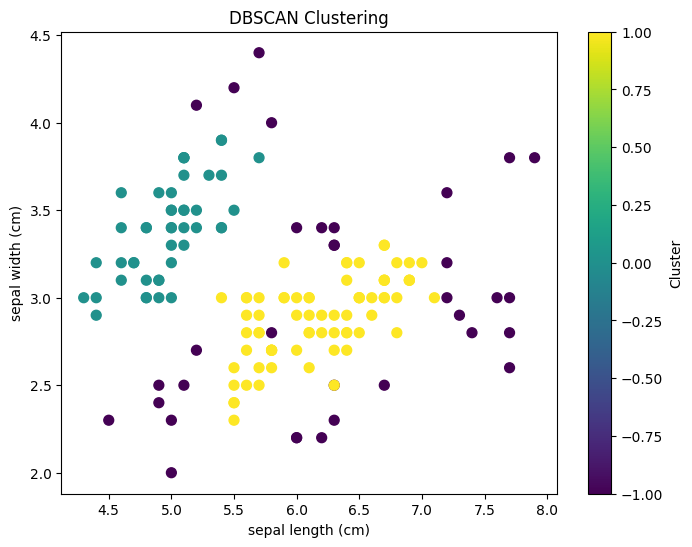

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['cluster'], cmap='viridis', s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('DBSCAN Clustering')
plt.show()


5. Сделайте вывод

Кластеризация — это задача разделения объектов на группы (кластеры) таким образом, чтобы объекты внутри одного кластера были похожи друг на друга, а между кластерами отличались.

Цели кластеризации

Поиск скрытых структур в данных.

Анализ сегментации данных.

Упрощение моделей и визуализация.

Алгоритм кластеризации Ллойда

Это один из вариантов алгоритма K-средних, который итеративно перераспределяет точки между кластерами, минимизируя расстояние до центроидов.

Как выбрать количество кластеров для K-средних
Используют метод локтя (Elbow Method) или коэффициент силуэта (Silhouette Score).

Алгоритм DBSCAN
Плотностной алгоритм кластеризации, который объединяет точки, находящиеся рядом друг с другом. Преимущества: умение находить кластеры произвольной формы, устойчивость к шуму.